## PDF Classifier

classifying pdf into 4 classes -[Lighting, Fuses, Cables, Others]

### Load the datasets

In [3]:
!pip install numpy
!pip install pandas

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3d/67/928e8f0d5c7fd32f32fb5caf92b186a1b3826dbaf5a294e13a976d6c38b6/numpy-2.0.1-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.0.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.0.1-cp311-cp311-win_amd64.whl (16.6 MB)



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
train_data.head()

,datasheet_link,target_col
0,https://lfillumination.com/files/specsheets/EF...,lighting
1,https://lfillumination.com/files/specsheets/EF...,lighting
2,https://lfillumination.com/files/specsheets/EF...,lighting
3,https://www.waclighting.com/storage/waclightin...,lighting
4,https://www.acuitybrands.com/api/products/geta...,lighting


In [4]:
test_data.head()

,datasheet_link,target_col
0,https://lumenart.com/images/alume/awl-01_specs...,lighting
1,https://lumenart.com/images/fabric/rdc/rdc_spe...,lighting
2,https://lumenart.com/images/fabric/cyp/cyp_spe...,lighting
3,https://lumenart.com/images/designer/wlp_specs...,lighting
4,https://lumenart.com/images/designer/wcp/wcp-s...,lighting


In [5]:
train_data.describe()

,datasheet_link,target_col
count,1895,1895
unique,1198,4
top,-,lighting
freq,39,500


In [6]:
train_data.groupby('target_col').count()

,datasheet_link
target_col,
cable,500
fuses,500
lighting,500
others,395


### Extracting PDF Text

In [1]:
!pip install requests pdfminer.six


  Obtaining dependency information for pdfminer.six from https://files.pythonhosted.org/packages/67/7d/44d6b90e5a293d3a975cefdc4e12a932ebba814995b2a07e37e599dd27c6/pdfminer.six-20240706-py3-none-any.whl.metadata
  Obtaining dependency information for cryptography>=36.0.0 from https://files.pythonhosted.org/packages/e6/3d/696e7a0f04555c58a2813d47aaa78cb5ba863c1f453c74a4f45ae772b054/cryptography-43.0.0-cp39-abi3-win_amd64.whl.metadata
  Obtaining dependency information for cffi>=1.12 from https://files.pythonhosted.org/packages/ca/42/74cb1e0f1b79cb64672f3cb46245b506239c1297a20c0d9c3aeb3929cb0c/cffi-1.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pycparser from https://files.pythonhosted.org/packages/13/a3/a812df4e2dd5696d1f351d58b8fe16a405b234ad2886a0dab9183fb78109/pycparser-2.22-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   -----------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install pytesseract pillow pdf2image


  Obtaining dependency information for pytesseract from https://files.pythonhosted.org/packages/c5/54/ec007336f38d2d4ce61f3544af3e6855dacbf04a1ac8294f10cabe81146f/pytesseract-0.3.10-py3-none-any.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/c1/d0/5866318eec2b801cdb8c82abf190c8343d8a1cd8bf5a0c17444a6f268291/pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata
  Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Obtaining dependency information for pdf2image from https://files.pythonhosted.org/packages/62/33/61766ae033518957f877ab246f87ca30a85b778ebaad65b7f74fa7e52988/pdf2image-1.17.0-py3-none-any.whl.metadata
Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import requests
from io import BytesIO
from pdfminer.high_level import extract_text
from pdfminer.pdfparser import PDFSyntaxError
from pdf2image import convert_from_bytes
import pytesseract

In [36]:
def extract(pdf_url):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        session = requests.Session()

        response = requests.get(pdf_url, headers=headers, timeout = 30)

        if response.status_code == 200:
            pdf_file = BytesIO(response.content)

            try:

                text = extract_text(pdf_file)

                if text.strip():
                    return text
                
                else:
                    raise ValueError("Empty text extracted by PDFMiner, falling back to OCR.")
                
            except (PDFSyntaxError, ValueError) as e:
                print(f"PDFMiner failed or empty text extracted. Falling back to OCR for URL: {pdf_url}. Error: {e}")

                images = convert_from_bytes(response.content)

                text = ""

                for image in images:
                    text += pytesseract.image_to_string(image)
                
                return text
            
        else:
            print(f"Failed to retrieve PDF from {pdf_url}. Status code: {response.status_code}")
            return "Failed to retrieve PDF"
    
    except requests.exceptions.Timeout:
        print(f"Request timed out for URL: {pdf_url}")
        return None
        
    except Exception as e:
            print(f"An error occurred while fetching the PDF from {pdf_url}: {e}")
            return "Error fetching PDF"

In [9]:
def process_pdf(df):
    if "datasheet_link" not in df.columns or 'target_col' not in df.columns:
        print("CSV file must contain 'pdf_url' and 'label' columns")
        return
    
    results = []

    for index, row in df.iterrows():
        pdf_url = row['datasheet_link']
        label = row['target_col']
        print(f"Processing URL {index + 1}: {pdf_url}")

        pdf_text = extract(pdf_url)

        results.append({
            'pdf_link': pdf_url,
            'text': pdf_text,
            'label': label
            
        })
    
    text_extracted_df = pd.DataFrame(results)
    return text_extracted_df

In [14]:
def split_dataframe(df, n):
    return np.array_split(df, n)

In [15]:
train_data_split = split_dataframe(train_data, 5)

c:\Users\Shivam Pal\Downloads\Assignment\pdf_classifier\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
for i, split in enumerate(train_data_split):
    print(f"Split {i+1}:\n", split, "\n")

Split 1:
                                         datasheet_link target_col
0    https://lfillumination.com/files/specsheets/EF...   lighting
1    https://lfillumination.com/files/specsheets/EF...   lighting
2    https://lfillumination.com/files/specsheets/EF...   lighting
3    https://www.waclighting.com/storage/waclightin...   lighting
4    https://www.acuitybrands.com/api/products/geta...   lighting
..                                                 ...        ...
374  https://www.waclighting.com/product/1-ledme-4/...   lighting
375  https://www.waclighting.com/product/1-ledme-2/...   lighting
376  https://www.waclighting.com/storage/waclightin...   lighting
377  https://www.waclighting.com/storage/waclightin...   lighting
378  https://www.waclighting.com/product/1-ledme-8/...   lighting

[379 rows x 2 columns] 

Split 2:
                                         datasheet_link target_col
379  https://www.waclighting.com/product/1-ledme-6/...   lighting
380  https://www.waclighting.c

In [17]:
train_data_1 = train_data_split[0]
train_data_2 = train_data_split[1]
train_data_3 = train_data_split[2]
train_data_4 = train_data_split[3]
train_data_5 = train_data_split[4]

In [37]:
train_extract_data = process_pdf(train_data_1)

Processing URL 1: https://lfillumination.com/files/specsheets/EF408B-Light-Unit.pdf
Processing URL 2: https://lfillumination.com/files/specsheets/EF411B.PDF
Failed to retrieve PDF from https://lfillumination.com/files/specsheets/EF411B.PDF. Status code: 404
Processing URL 3: https://lfillumination.com/files/specsheets/EF407B-Light-Unit.pdf
Processing URL 4: https://www.waclighting.com/storage/waclighting-images/specsheet_pdf/5221_SPSHT.pdf
Processing URL 5: https://www.acuitybrands.com/api/products/getasset/healthcare-lighting/1626980/677116f7-4592-4516-9d8c-eae892e07331/hdmc.pdf?abl_version=02%2f23%2f2023+18%3a13%3a41&DOC_Type=SPEC_SHEET
Processing URL 6: https://www.acuitybrands.com/api/products/getasset/holophane/1649332/4408a251-09be-4b61-813f-177b3ebcf10c/holophane-care222-hldmpc-cylinder-pendant-with-cord.pdf?abl_version=01%2f12%2f2023+16%3a54%3a24&DOC_Type=SPEC_SHEET
Failed to retrieve PDF from https://www.acuitybrands.com/api/products/getasset/holophane/1649332/4408a251-09be-4b

In [44]:
train_extract_data = pd.concat([train_extract_data, process_pdf(train_data_2)], ignore_index=True)

Processing URL 380: https://www.waclighting.com/product/1-ledme-6/?download=specs2&1676590944
Processing URL 381: https://www.waclighting.com/product/2-5-low-voltage-4/?download=specs2&1676595958
Processing URL 382: https://www.waclighting.com/storage/waclighting-images/specsheet_pdf/R3ARDL_SPSHT.pdf
Processing URL 383: https://lithonia.acuitybrands.com/api/products/getasset/lithonia-lighting/47797/0c312bbe-e178-4984-87bd-e108835636ae/vrt-1x4_f.pdf?abl_version=11%2f18%2f2022+18%3a01%3a40&DOC_Type=SPEC_SHEET
Processing URL 384: https://www.axislighting.com/application/files/3116/7778/0070/Stencil-Flex-TDHDP.SPEC.pdf
Failed to retrieve PDF from https://www.axislighting.com/application/files/3116/7778/0070/Stencil-Flex-TDHDP.SPEC.pdf. Status code: 404
Processing URL 385: https://www.axislighting.com/application/files/1016/6491/5004/B2SQD.LED.SPEC.pdf
Failed to retrieve PDF from https://www.axislighting.com/application/files/1016/6491/5004/B2SQD.LED.SPEC.pdf. Status code: 404
Processing UR

In [45]:
train_extract_data = pd.concat([train_extract_data, process_pdf(train_data_3)], ignore_index=True)

Processing URL 759: https://www.schurter.com/en/datasheet/typ_UMT-H.pdf
Processing URL 760: https://www.littelfuse.com/media?resourcetype=datasheets&itemid=1a83e408-fdbe-48de-8389-c4f8ebb8232e&filename=littelfuse-fuse-372-datasheet
Processing URL 761: https://www.littelfuse.com/media?resourcetype=datasheets&itemid=533cd5cc-956c-4243-867f-6ab5a62f6ba1&filename=littelfuse_fuse_451_453_datasheet.pdf
Processing URL 762: https://www.littelfuse.com/media?resourcetype=datasheets&itemid=28004c2f-992c-4d86-8a35-f495c62803a6&filename=littelfuse_fuse_396_datasheet.pdf
Processing URL 763: https://www.littelfuse.com/~/media/electronics/datasheets/fuses/littelfuse_fuse_437_datasheet.pdf.pdf
Processing URL 764: https://www.littelfuse.com/media?resourcetype=datasheets&itemid=82476e74-6b5c-4262-88c8-0e436eab1447&filename=littelfuse_fuse_313_315_datasheet.pdf
Processing URL 765: https://www.littelfuse.com/media?resourcetype=datasheets&itemid=624ac410-146d-47dc-9971-cdaaa78f2c78&filename=littelfuse_fuse_

In [46]:
train_extract_data = pd.concat([train_extract_data, process_pdf(train_data_4)], ignore_index=True)

Processing URL 1138: https://html5.dcatalog.com/?docid=8e9daddd-82b0-4ed4-a656-a8aa011ea6d3#page=157
PDFMiner failed or empty text extracted. Falling back to OCR for URL: https://html5.dcatalog.com/?docid=8e9daddd-82b0-4ed4-a656-a8aa011ea6d3#page=157. Error: No /Root object! - Is this really a PDF?
An error occurred while fetching the PDF from https://html5.dcatalog.com/?docid=8e9daddd-82b0-4ed4-a656-a8aa011ea6d3#page=157: Unable to get page count. Is poppler installed and in PATH?
Processing URL 1139: -
An error occurred while fetching the PDF from -: Invalid URL '-': No scheme supplied. Perhaps you meant https://-?
Processing URL 1140: https://www.te.com/commerce/DocumentDelivery/DDEController?Action=srchrtrv&DocNm=2524E0114&DocType=Customer+Drawing&DocLang=English
Request timed out for URL: https://www.te.com/commerce/DocumentDelivery/DDEController?Action=srchrtrv&DocNm=2524E0114&DocType=Customer+Drawing&DocLang=English
Processing URL 1141: //mm.digikey.com/Volume0/opasdata/d220001/

In [47]:
train_extract_data = pd.concat([train_extract_data, process_pdf(train_data_5)], ignore_index=True)

Processing URL 1517: https://www.te.com/usa-en/product-2-2834074-2.datasheet.pdf
Request timed out for URL: https://www.te.com/usa-en/product-2-2834074-2.datasheet.pdf
Processing URL 1518: https://www.te.com/commerce/DocumentDelivery/DDEController?Action=srchrtrv&DocNm=1954289&DocType=Customer+Drawing&DocLang=English
An error occurred while fetching the PDF from https://www.te.com/commerce/DocumentDelivery/DDEController?Action=srchrtrv&DocNm=1954289&DocType=Customer+Drawing&DocLang=English: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Processing URL 1519: https://www.te.com/usa-en/product-2154829-1.datasheet.pdf
Request timed out for URL: https://www.te.com/usa-en/product-2154829-1.datasheet.pdf
Processing URL 1520: //mm.digikey.com/Volume0/opasdata/d220001/medias/docus/665/1704858.pdf
An error occurred while fetching the PDF from //mm.digikey.com/Volume0/opasdata/d220001/medias/docus/665/1704858.pdf: Invalid URL '//mm.digikey.com/Volume0

The PDF <_io.BytesIO object at 0x0000026923CB3790> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


Processing URL 1532: https://www.te.com/usa-en/product-2008563-1.datasheet.pdf
Request timed out for URL: https://www.te.com/usa-en/product-2008563-1.datasheet.pdf
Processing URL 1533: https://www.hirose.com/product/document?clcode=CL0667-0028-7-21&productname=DF59SN-1P-FC(21)&series=DF59S__DF59SN&documenttype=Catalog&lang=en&documentid=D31625_en
Failed to retrieve PDF from https://www.hirose.com/product/document?clcode=CL0667-0028-7-21&productname=DF59SN-1P-FC(21)&series=DF59S__DF59SN&documenttype=Catalog&lang=en&documentid=D31625_en. Status code: 500
Processing URL 1534: https://www.te.com/usa-en/product-2-2834006-1.datasheet.pdf
Request timed out for URL: https://www.te.com/usa-en/product-2-2834006-1.datasheet.pdf
Processing URL 1535: https://www.jst-mfg.com/product/pdf/eng/eLEB.pdf
Processing URL 1536: https://www.te.com/usa-en/product-2834006-2.datasheet.pdf
Request timed out for URL: https://www.te.com/usa-en/product-2834006-2.datasheet.pdf
Processing URL 1537: https://www.te.com

In [48]:
train_extract_data.describe()

,pdf_link,label,text
count,1895,1895,1895
unique,1198,4,694
top,-,lighting,Error fetching PDF
freq,39,500,583


In [50]:
train_extract_data.groupby('label').count()

,pdf_link,text
label,,
cable,500,500
fuses,500,500
lighting,500,500
others,395,395


In [60]:
train_extract_data = train_extract_data[~train_extract_data['text'].str.contains('Failed to retrieve PDF|Error fetching PDF|Failed to extract text', na=False)]

In [61]:
train_extract_data.head()

,pdf_link,label,text
0,https://lfillumination.com/files/specsheets/EF...,lighting,EF400 System # EF408B\nDIE CAST CYLINDRICAL LI...
2,https://lfillumination.com/files/specsheets/EF...,lighting,EF400 System # EF407B\nDIE CAST CYLINDRICAL LI...
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V\n5221\n\nFixture...
4,https://www.acuitybrands.com/api/products/geta...,lighting,HIGHLIGHTS\n\n• Featuring Care222® far-UVC di...
6,https://lfillumination.com/files/specsheets/KA...,lighting,KATRPB\nCYLINDER PENDANT MOUNT\nSMALL\n\nINTEG...


In [62]:
train_extract_data.describe()

,pdf_link,label,text
count,1086,1086,1086
unique,684,4,691
top,https://www.littelfuse.com/media?resourcetype=...,fuses,154/154T/154L/154TL Series OMNI-BLOK® Fuse and...
freq,29,464,30


In [63]:
train_extract_data.groupby('label').count()

,pdf_link,text
label,,
cable,106,106
fuses,464,464
lighting,433,433
others,83,83


In [41]:
test_extract_data = process_pdf(test_data)

Processing URL 1: https://lumenart.com/images/alume/awl-01_specs.pdf
Processing URL 2: https://lumenart.com/images/fabric/rdc/rdc_specs.pdf
Processing URL 3: https://lumenart.com/images/fabric/cyp/cyp_specs.pdf
Processing URL 4: https://lumenart.com/images/designer/wlp_specs.pdf
Processing URL 5: https://lumenart.com/images/designer/wcp/wcp-s_specs.pdf
Processing URL 6: https://www.luminis.com/assets/Uploads/SPECS-MAYA-MA50-JULY2022-REV4.pdf
Processing URL 7: https://www.luminis.com/assets/Uploads/SPECS-PRISMA-PR1280-PR1285-SEPT2022-REV4.pdf
Processing URL 8: https://www.luminis.com/assets/Uploads/SPECS-SYRIOS-SQUARE-SQ405-JUL2022-REV6.pdf
Failed to retrieve PDF from https://www.luminis.com/assets/Uploads/SPECS-SYRIOS-SQUARE-SQ405-JUL2022-REV6.pdf. Status code: 404
Processing URL 9: https://www.luminis.com/assets/Uploads/SPECS-SYRIOS-SQUARE-SQ510-JUL2022-REV6.pdf
Failed to retrieve PDF from https://www.luminis.com/assets/Uploads/SPECS-SYRIOS-SQUARE-SQ510-JUL2022-REV6.pdf. Status code: 

The PDF <_io.BytesIO object at 0x000002692493D080> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


Processing URL 276: https://boltontechnical.com/content/geek-sheets/BT974754-500-ft-Bolton-240-Black-Cable-Spool-Geek-Sheet.pdf
Processing URL 277: https://timesmicrowave.com/wp-content/uploads/2022/06/lmr-600-uf-datasheet.pdf
Processing URL 278: https://timesmicrowave.com/wp-content/uploads/2022/03/lmr-600-coax-cables-datasheet.pdf
Processing URL 279: https://www.alphawire.com/products/cable/alpha-essentials/coaxial-cable/9058ac/
PDFMiner failed or empty text extracted. Falling back to OCR for URL: https://www.alphawire.com/products/cable/alpha-essentials/coaxial-cable/9058ac/. Error: No /Root object! - Is this really a PDF?
An error occurred while fetching the PDF from https://www.alphawire.com/products/cable/alpha-essentials/coaxial-cable/9058ac/: Unable to get page count. Is poppler installed and in PATH?
Processing URL 280: https://catalog.belden.com/techdata/EN/89207_techdata.pdf
Processing URL 281: https://timesmicrowave.com/wp-content/uploads/2022/06/lmr-195-datasheet.pdf
Proce

The PDF <_io.BytesIO object at 0x0000026929B5E480> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


Processing URL 381: https://www.molex.com/pdm_docs/sd/1000680107_sd.pdf
An error occurred while fetching the PDF from https://www.molex.com/pdm_docs/sd/1000680107_sd.pdf: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Processing URL 382: https://html5.dcatalog.com/?docid=8e9daddd-82b0-4ed4-a656-a8aa011ea6d3#page=148
PDFMiner failed or empty text extracted. Falling back to OCR for URL: https://html5.dcatalog.com/?docid=8e9daddd-82b0-4ed4-a656-a8aa011ea6d3#page=148. Error: No /Root object! - Is this really a PDF?
An error occurred while fetching the PDF from https://html5.dcatalog.com/?docid=8e9daddd-82b0-4ed4-a656-a8aa011ea6d3#page=148: Unable to get page count. Is poppler installed and in PATH?
Processing URL 383: https://mm.digikey.com/Volume0/opasdata/d220001/medias/docus/5049/AA-12121.pdf
Processing URL 384: https://www.mcgillmicrowave.com/product/rg179/?attachment_id=18369&download_file=dix7ul2vun7uw
An error occurred while fetching the

In [43]:
test_extract_data.describe()

,pdf_link,label,text
count,400,400,400
unique,258,4,189
top,https://multimedia.3m.com/mws/media/1255423O/e...,cable,Error fetching PDF
freq,14,125,74


In [64]:
test_extract_data = test_extract_data[~test_extract_data['text'].str.contains('Failed to retrieve PDF|Error fetching PDF|Failed to extract text', na=False)]

In [65]:
test_extract_data.describe()

,pdf_link,label,text
count,257,257,257
unique,182,4,186
top,https://www.ebmpapst.com/content/dam/ebm-papst...,lighting,Accessories - Capacitors\n\nCAPACITORS \n\nFOR...
freq,11,80,11


In [67]:
train_extract_data.to_csv('train_extract_data.csv')

In [505]:
train_extract_data = pd.read_csv('train_extract_data.csv', index_col=0)
test_extract_data = pd.read_csv('test_extract_data.csv', index_col=0)

In [68]:
test_extract_data.to_csv('test_extract_data.csv')

### Clean the extracted text

In [70]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/46/79/9daa0fcc1b3ccd51012fe733f9375c1201704eaaaae3fae03ea397cda780/nltk-3.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for joblib from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/04/4d/80e04f4e27ab0cbc9096e2d10696da6d9c26a39b60db52670fd57614fea5/regex-2024.7.24-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [506]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [507]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Shivam
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [508]:
#remove hashtags

def hashtags(text):
    clean_text = re.findall(r"#(\w+)", text)
    return text

#remove @users

def remove_users(text):
    clean_text = re.sub('(@[a-zA-Z]+[a-zA-Z0-9-_]+)', '', text)
    return clean_text

# remove links
def remove_links(text):
    clean_text = re.sub(r'http\S+', '', text)
    clean_text = re.sub(r'bit.ly/\S+', '', text)
    clean_text = clean_text.strip('[link]')
    return clean_text

# remove non ascii character

def non_ascii(text):
    return "". join(i for i in text if ord(i) < 128)

# lowercase

def lower_case(text):
    return text.lower()

# remove stop words

def remove_stopwords(text):
    cachedStopWords = set(stopwords.words('english'))
    cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
    clean_text = ' '.join(word for word in text.split() if word not in cachedStopWords)
    return clean_text

#remove email address

def remove_email(text):
    clean_text = re.compile(r'[\w\.-]+@[\w\.-]+')
    return clean_text.sub(r'', text)

# remove punctuation

def punct(text):
    token = RegexpTokenizer(r'\w+')
    clean_text = token.tokenize(text)
    clean_text = ' '.join(clean_text)
    return clean_text

# remove digits and special characters

def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern, '', text)

def remove_special_charcter(text):
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]+[_]+'
    return re.sub(pat, '', text)

# remove underscore

def remove_(text):
    clean_text = re.sub('([_]+)', '', text)
    return clean_text

def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

In [509]:
def clean_text(df, col):
    df[col] = df[col].apply(func = clean_html)
    df[col] = df[col].apply(func = remove_digits)
    df[col] = df[col].apply(func = remove_email)
    df[col] = df[col].apply(func = remove_links)
    df[col] = df[col].apply(func = remove_special_charcter)
    df[col] = df[col].apply(func = remove_users)
    df[col] = df[col].apply(func = remove_stopwords)
    df[col] = df[col].apply(func = remove_)
    df[col] = df[col].apply(func = punct)
    df[col] = df[col].apply(func = lower_case)
    df[col] = df[col].apply(func = non_ascii)
    return df

In [510]:
clean_text(train_extract_data, 'text')

,pdf_link,label,text
0,https://lfillumination.com/files/specsheets/EF...,lighting,ef system efb die cast cylindrical light unit ...
2,https://lfillumination.com/files/specsheets/EF...,lighting,ef system efb die cast cylindrical light unit ...
3,https://www.waclighting.com/storage/waclightin...,lighting,adjustable beam wall wash v fixture type catal...
4,https://www.acuitybrands.com/api/products/geta...,lighting,highlights featuring care faruvc disinfection ...
6,https://lfillumination.com/files/specsheets/KA...,lighting,katrpb cylinder pendant mount small integral d...
...,...,...,...
1792,https://www.jkllamps.com/pdfs/BXA-12577.pdf,others,q l r max d d d hv d hg l inn n ii ii ii ii u ...
1793,https://www.jkllamps.com/pdfs/BXA-12529_PS1.pdf,others,j j o note wire retention area iv n descriptio...
1796,https://www.microsemi.com/document-portal/doc_...,others,panelmatch lxmx n t e g r t e d p r o d u c t ...
1822,https://www.jkllamps.com/pdfs/NDL-104LP.pdf,others,maximum ratings items maximum ratings operatin...


In [511]:
clean_text(test_extract_data, 'text')

,pdf_link,label,text
0,https://lumenart.com/images/alume/awl-01_specs...,lighting,awl awl m c awl asc specifications material ma...
1,https://lumenart.com/images/fabric/rdc/rdc_spe...,lighting,rdc series specifications construction fabric ...
2,https://lumenart.com/images/fabric/cyp/cyp_spe...,lighting,cyp series cypx cypx cypx specifications const...
3,https://lumenart.com/images/designer/wlp_specs...,lighting,wlp mounting mounts octagon junction box x jun...
4,https://lumenart.com/images/designer/wcp/wcp-s...,lighting,wcps n oak walnut specifications construction ...
...,...,...,...
393,https://catalog.belden.com/techdata/EN/8219_te...,cable,product ohm wireless transmission coax rg awg ...
395,https://catalog.belden.com/techdata/EN/3092A_t...,cable,product controlbus coax rg sol bccs fpe ins qu...
397,https://timesmicrowave.com/wp-content/uploads/...,cable,f u r m l times microwave systems lmruf ultraf...
398,https://catalog.belden.com/techdata/EN/1505A_t...,cable,product ohm sdi coax rg awg solid bc foil tc b...


### Text lemmatization

In [512]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to C:\Users\Shivam
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Shivam
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Shivam
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [513]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [514]:
Lemmatizer = WordNetLemmatizer()

In [515]:
def lemmatize_text(text):
    words = word_tokenize(text)

    lemmatize_text = " ". join([Lemmatizer.lemmatize(word) for word in words])
    return lemmatize_text

In [516]:
train_extract_data['text'] = train_extract_data['text'].apply(lemmatize_text)

In [517]:
train_extract_data.head()

,pdf_link,label,text
0,https://lfillumination.com/files/specsheets/EF...,lighting,ef system efb die cast cylindrical light unit ...
2,https://lfillumination.com/files/specsheets/EF...,lighting,ef system efb die cast cylindrical light unit ...
3,https://www.waclighting.com/storage/waclightin...,lighting,adjustable beam wall wash v fixture type catal...
4,https://www.acuitybrands.com/api/products/geta...,lighting,highlight featuring care faruvc disinfection t...
6,https://lfillumination.com/files/specsheets/KA...,lighting,katrpb cylinder pendant mount small integral d...


In [518]:
test_extract_data['text'] = test_extract_data['text'].apply(lemmatize_text)

In [519]:
test_extract_data.head()

,pdf_link,label,text
0,https://lumenart.com/images/alume/awl-01_specs...,lighting,awl awl m c awl asc specification material mac...
1,https://lumenart.com/images/fabric/rdc/rdc_spe...,lighting,rdc series specification construction fabric l...
2,https://lumenart.com/images/fabric/cyp/cyp_spe...,lighting,cyp series cypx cypx cypx specification constr...
3,https://lumenart.com/images/designer/wlp_specs...,lighting,wlp mounting mount octagon junction box x junc...
4,https://lumenart.com/images/designer/wcp/wcp-s...,lighting,wcps n oak walnut specification construction r...


### Vectorization - TF-IDF

In [520]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [521]:
X = train_extract_data['text']
y = train_extract_data['label']

In [522]:
X

0       ef system efb die cast cylindrical light unit ...
2       ef system efb die cast cylindrical light unit ...
3       adjustable beam wall wash v fixture type catal...
4       highlight featuring care faruvc disinfection t...
6       katrpb cylinder pendant mount small integral d...
                              ...                        
1792    q l r max d d d hv d hg l inn n ii ii ii ii u ...
1793    j j o note wire retention area iv n descriptio...
1796    panelmatch lxmx n t e g r t e d p r o d u c t ...
1822    maximum rating item maximum rating operating r...
1875    specification customer module no wiccfl approv...
Name: text, Length: 1086, dtype: object

In [523]:
vectorizer = TfidfVectorizer()

In [526]:
x_train_tfidf = vectorizer.fit_transform(X)

In [524]:
import joblib

In [472]:
print(x_train_tfidf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.05844419 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [527]:
X_test = test_extract_data['text']
y_test = test_extract_data['label']

In [528]:
X_test

0      awl awl m c awl asc specification material mac...
1      rdc series specification construction fabric l...
2      cyp series cypx cypx cypx specification constr...
3      wlp mounting mount octagon junction box x junc...
4      wcps n oak walnut specification construction r...
                             ...                        
393    product ohm wireless transmission coax rg awg ...
395    product controlbus coax rg sol bccs fpe in qua...
397    f u r m l time microwave system lmruf ultrafle...
398    product ohm sdi coax rg awg solid bc foil tc b...
399    product ohm analog video coax rg awg str bc bc...
Name: text, Length: 257, dtype: object

In [529]:
x_test_tfidf = vectorizer.transform(X_test)

### Encoding the Labels

In [531]:
from sklearn.preprocessing import LabelEncoder

In [532]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)
y_test_encoded = label_encoder.transform(y_test)

In [533]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [534]:
print("Label encoding mapping:")
for label, encoded in label_mapping.items():
    print(f"{encoded}: {label}")

Label encoding mapping:
0: cable
1: fuses
2: lighting
3: others


In [536]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

### Oversampling -SMOTE

In [543]:
from imblearn.over_sampling import SMOTE

In [544]:
smote = SMOTE(random_state=42)

In [545]:
X_train_smote, y_train_smote = smote.fit_resample(x_train_tfidf, y_train_encoded)

In [546]:
print(pd.Series(y_train_smote).value_counts())

2    464
1    464
0    464
3    464
Name: count, dtype: int64


In [547]:
print(f"Training data shape after SMOTE: {X_train_smote.shape}")
print(f"Test data shape: {x_test_tfidf.shape}")

Training data shape after SMOTE: (1856, 12280)
Test data shape: (257, 12280)


### Model 1 - Naive Bayes Classifier

In [548]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [549]:
from sklearn.metrics import cohen_kappa_score

In [550]:
nb_classifier = MultinomialNB()

In [551]:
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True]  # Tune the fit_prior parameter
}

In [552]:
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5, scoring='f1_weighted', n_jobs=-1)

In [553]:
grid_search_nb.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'fit_prior': [True]},
             scoring='f1_weighted')

In [554]:
print("Best parameters found: ", grid_search_nb.best_params_)
print("Best cross-validation accuracy: {:2f}%".format(grid_search_nb.best_score_))

Best parameters found:  {'alpha': 0.1, 'fit_prior': True}
Best cross-validation accuracy: 0.989745%


In [555]:
y_pred = grid_search_nb.best_estimator_.predict(x_test_tfidf)

In [556]:
y_pred_proba = grid_search_nb.best_estimator_.predict_proba(x_test_tfidf)

In [557]:
print("Label encoding mapping:")
for label, encoded in label_mapping.items():
    print(f"{encoded}: {label}")

Label encoding mapping:
0: cable
1: fuses
2: lighting
3: others


In [558]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       0.96      1.00      0.98        49
           2       0.63      1.00      0.78        80
           3       1.00      0.06      0.11        53

    accuracy                           0.81       257
   macro avg       0.89      0.76      0.71       257
weighted avg       0.87      0.81      0.74       257



In [559]:
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)

[[75  0  0  0]
 [ 0 49  0  0]
 [ 0  0 80  0]
 [ 2  2 46  3]]


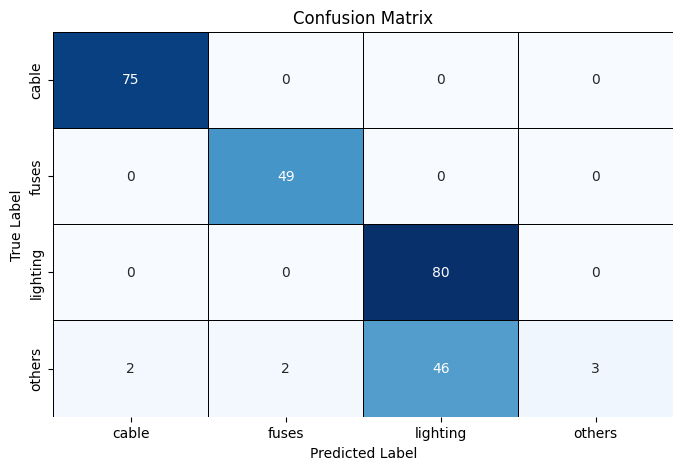

In [560]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot using seaborn heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [494]:
kappa_score = cohen_kappa_score(y_test_encoded, y_pred)
print(f"Cohen's Kappa Score: {kappa_score:.2f}")

Cohen's Kappa Score: 0.73


### Model 2 - Random Forrest Classifier

In [350]:
from sklearn.ensemble import RandomForestClassifier

In [351]:
rf_classifier = RandomForestClassifier(random_state=42)

In [352]:
param_grid_rf = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [353]:
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)


In [354]:
grid_search_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200]},
             scoring='f1_weighted', verbose=2)

In [355]:
print("Best parameters found: ", grid_search_rf.best_params_)

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}


In [356]:
best_rf_classifier = grid_search_rf.best_estimator_

In [357]:
y_pred = best_rf_classifier.predict(x_test_tfidf)

In [358]:
print("Label encoding mapping:")
for label, encoded in label_mapping.items():
    print(f"{encoded}: {label}")

Label encoding mapping:
0: cable
1: fuses
2: lighting
3: others


In [359]:
print("Accuracy on test data: {: .2f}%".format( accuracy_score(y_test_encoded, y_pred)))
print("Classification report:\n", classification_report(y_test_encoded, y_pred))

Accuracy on test data:  0.89%
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        75
           1       1.00      1.00      1.00        49
           2       0.77      1.00      0.87        80
           3       0.91      0.58      0.71        53

    accuracy                           0.89       257
   macro avg       0.92      0.88      0.89       257
weighted avg       0.91      0.89      0.89       257



In [360]:
cm = confusion_matrix(y_test_encoded, y_pred)

In [361]:
print(cm)

[[70  0  2  3]
 [ 0 49  0  0]
 [ 0  0 80  0]
 [ 0  0 22 31]]


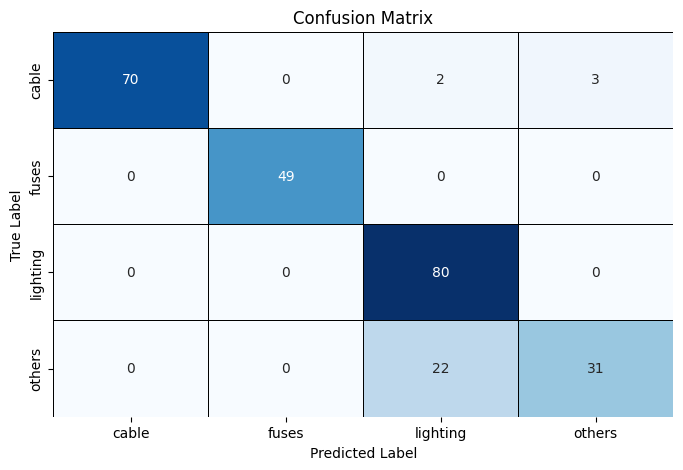

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot using seaborn heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [363]:
kappa_score = cohen_kappa_score(y_test_encoded, y_pred)
print(f"Cohen's Kappa Score: {kappa_score:.2f}")

Cohen's Kappa Score: 0.86


### Model 3 - XGBoost Classifier

In [278]:
%pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [364]:
import xgboost as xgb

In [365]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), use_label_encoder=False)

In [366]:
param_grid_xgb = {
    'n_estimators': [50, 75],               # Number of trees
    'max_depth': [None, 3],                       # Maximum depth of trees
    'learning_rate': [0.001, 0.01],            # Learning rate
    'subsample': [0.8, 0.9],                 # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.8, 0.9],          # Fraction of features used for each tree
    'gamma': [0.1, 0.2],                       # Regularization parameter
    'reg_alpha': [0.1, 0.2],                   # L1 regularization term
    'reg_lambda': [1, 2]                     # L2 regularization term
}

In [371]:
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, scoring='f1', cv=5, n_jobs=-1, verbose=1)

In [372]:
grid_search_xgb.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0.1, 0.2],
                         'learning_rate': [0.001, 0.01], 'max_depth': [None, 3],
                         'n_estimators': [50, 75], 'reg_alpha': [0.1, 0.2],
                         'reg_lambda': [1, 2], 'subsample': [0.8, 0.9]},
             scoring='f1', verbose=1)

In [373]:
print("Best parameters found: ", grid_search_xgb.best_params_)

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': None, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}


In [374]:
best_xgb_classifier = grid_search_xgb.best_estimator_


In [375]:
y_pred = best_xgb_classifier.predict(x_test_tfidf)

In [376]:
print("Accuracy on test data: {: .2f}".format(accuracy_score(y_test_encoded, y_pred)))
print("Classification report:\n", classification_report(y_test_encoded, y_pred))

Accuracy on test data:  0.93
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.96      1.00      0.98        49
           2       0.86      1.00      0.92        80
           3       0.95      0.72      0.82        53

    accuracy                           0.93       257
   macro avg       0.94      0.92      0.93       257
weighted avg       0.94      0.93      0.93       257



In [377]:
cm = confusion_matrix(y_test_encoded, y_pred)

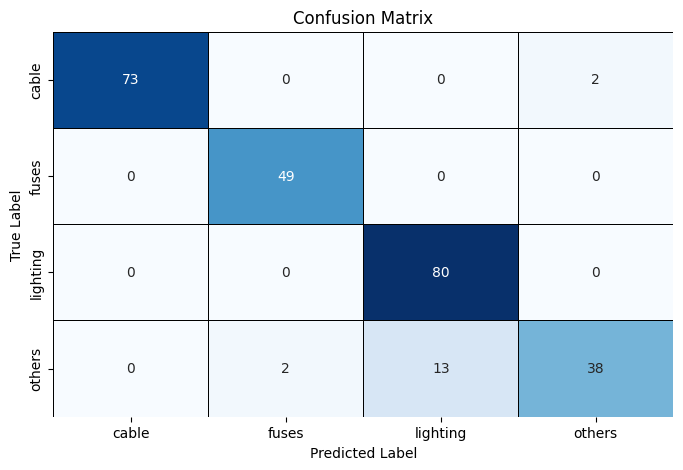

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot using seaborn heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [379]:
kappa_score = cohen_kappa_score(y_test_encoded, y_pred)
print(f"Cohen's Kappa Score: {kappa_score:.2f}")

Cohen's Kappa Score: 0.91


### Saving and Loading the Model

In [380]:
import pickle

In [412]:
with open('best_classifier.sav', 'wb') as file:
    pickle.dump(best_xgb_classifier, file)

In [413]:
with open('best_classifier.sav', 'rb') as file:
    model = pickle.load(file)

### Input Pipeline

In [502]:
def preprocess_input(link):
    extracted_text = extract(link)
    c_text = remove_digits(extracted_text)
    c_text = remove_links(c_text)
    c_text = remove_email(c_text)
    c_text = remove_special_charcter(c_text)
    c_text = remove_users(c_text)
    c_text = remove_stopwords(c_text)
    c_text = remove_(c_text)
    c_text = punct(c_text)
    c_text = lower_case(c_text)
    c_text = non_ascii(c_text)
    
    words = word_tokenize(c_text)

    lemmatized_text = " ". join([Lemmatizer.lemmatize(word) for word in words])

    transformed_text = vectorizer.transform([lemmatized_text])

    return transformed_text

    



In [540]:
def prediction(link):

    extracted_text = extract(link)
    c_text = remove_digits(extracted_text)
    c_text = remove_links(c_text)
    c_text = remove_email(c_text)
    c_text = remove_special_charcter(c_text)
    c_text = remove_users(c_text)
    c_text = remove_stopwords(c_text)
    c_text = remove_(c_text)
    c_text = punct(c_text)
    c_text = lower_case(c_text)
    c_text = non_ascii(c_text)
    
    words = word_tokenize(c_text)

    lemmatized_text = " ". join([Lemmatizer.lemmatize(word) for word in words])

    transformed_text = vectorizer.transform([lemmatized_text])


    class_prob = model.predict_proba(transformed_text)[0]

    predicted_class_index = class_prob.argmax()
    predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

    predicted_class_prob = class_prob[predicted_class_index]

    print(f"Predicted Class: {predicted_class_name}")
    print(f"Predicted Class Probability: {predicted_class_prob:.2f}")


    for class_index, probability in enumerate(class_prob):
        class_name = label_encoder.inverse_transform([class_index])[0]
        print(f"Class: {class_name}, Probability: {probability:.2f}")


    return predicted_class_name, class_prob

In [530]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [542]:
prediction('https://lumenart.com/images/alume/awl-01_specs.pdf')

An error occurred while fetching the PDF from AWL.01

AWL.01

4 in

1.88 in M.C.

3.75 in

3.75 in

AWL.01 ASC

4.5 in

4.5 in

4 in

SPECIFICATIONS
Material
Machined aluminum with stainless
steel fasteners.
Finish
Micro brushed with clear coat after
fabrication before assembly.

Optional ASC Canopy

  Mini Jbox by LumenArt

Mounting
New Construction: Mini Jbox by
LumenArt.
Remodel: 4” square Jbox with
round plaster ring or octagon box
order optional ASC canopy.

Electrical
ETL Indoor damp location listed.
LED lamp by LumenArt. Triac
dimming.

ORDERING LOGIC

Use matrix below to order complete fixture

Fixture
AWL.01

Lamping
4w LED 400lm

Voltage
120V

Glass
Frost
Cobalt Blue
Amber

Options
4.5” ASC
CANOPY

AWL.01      4w LED       120v

LumenArt,  Ltd.  3333  W.  47th.  St.,  Chicago,  IL  60632
Phone  773-254-0744  Fax  773-254-0767  www.lumenart.com

: No connection adapters were found for 'AWL.01\n\nAWL.01\n\n4 in\n\n1.88 in M.C.\n\n3.75 in\n\n3.75 in\n\nAWL.01 ASC\n\n4.5 in\n\n4

('others',
 array([0.24999267, 0.24999271, 0.24999356, 0.25002104], dtype=float32))